## Изучение данных из файла

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from scipy import stats as st
from scipy.stats import levene

In [ ]:
df.sample(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4351,F.E.A.R. 3,PS3,2011.0,Shooter,0.21,0.16,0.01,0.07,74.0,7.1,M
13790,Gal*Gun,X360,2011.0,Shooter,0.00,0.00,0.04,0.00,NaN,NaN,NaN
8739,Pressure Cooker,2600,1982.0,Action,0.14,0.01,0.00,0.00,NaN,NaN,NaN
9057,Uta no * Prince-Sama: Repeat,PSP,2011.0,Adventure,0.00,0.00,0.14,0.00,NaN,NaN,NaN
13098,Pawly Pets: My Vet Practice,DS,2007.0,Strategy,0.00,0.05,0.00,0.00,NaN,NaN,NaN
8492,Curious George,GBA,2006.0,Action,0.12,0.04,0.00,0.00,65.0,tbd,E
4512,Mischief Makers,N64,1997.0,Platform,0.25,0.06,0.07,0.06,NaN,NaN,NaN
5723,Alone in the Dark: One-Eyed Jack's Revenge,PS,1996.0,Adventure,0.17,0.12,0.00,0.02,NaN,NaN,NaN
5229,Super Robot Taisen A,GBA,2001.0,Strategy,0.00,0.00,0.35,0.01,NaN,NaN,NaN
11737,Backyard NBA Basketball,DS,2007.0,Sports,0.07,0.00,0.00,0.01,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('Blues')

,0
Name,0.01
Platform,0
Year_of_Release,1.61
Genre,0.01
NA_sales,0
EU_sales,0
JP_sales,0
Other_sales,0
Critic_Score,51.32
User_Score,40.09


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод
***
1. Названия столбцов - необходимо привести в нижний регистр
2. **Пропуски** - имеем пропуски в следующих полях:
    - Доля менее 2%: незначительное количество, оставим без изменений. Можно предположить, что данные были утеряны при выгрузке из источников.
        - Name;
        - Genre;
        - Year_of_Release;  
    - Доля выше 40%: необходимо провести анализ и изучить природу пропусков

        - Critic_Score
        - User_Score
        - Rating
3. **Приведение типа**:
    - Год выпуска *(Year_of_Release)* - тип данных с плавающей запятой.  
    В отношении представления года это не совсем удобно, переведем в целочиселнный тип данных.
    - Оценка пользователей *(User_Score)* - текущий тип *object* свидетельсвует о наличии строковых значений. Проведем анализ, по результатам будем принимать решение.

4. **Дубликаты** - их нет.


## Предобработка данных

**1. Перевод столбцов в нижний регистр**

In [ ]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**2. Работа с пропусками**

Проверим, связаны-ли пропуски в оценки критиков или пользователей еще с какими-нибудь данными.  
Сделаем срез по пропускам, отдельно посмотрим рейтинг.

In [ ]:
print('Пропусков полю "Оценка критиков":',len(df.loc[df['critic_score'].isna(), 'rating']))
print('Пропусков по полю "Рейтинг":', df.loc[df['critic_score'].isna(), 'rating'].isna().sum())

Пропусков полю "Оценка критиков": 8578
Пропусков по полю "Рейтинг": 6683


Вместе с пропусками по полю "Оценка критиков" допущены пропуски и пополю "Рейтинг", с долей 77%.  
Это очень большое количество, посмотрим на связь пропусков по полю "Оценка пользователей" с "Рейтингом".

In [ ]:
print('Пропусков по полю "Оценка пользователей":',len(df.loc[df['user_score'].isna(), 'rating']))
print('Пропусков по полю "Рейтинг":', df.loc[df['user_score'].isna(), 'rating'].isna().sum())

Пропусков по полю "Оценка пользователей": 6701
Пропусков по полю "Рейтинг": 6630


Практически у всех строк с пропусками по полю "Оценка пользователей" есть пропуски  в поле "Рейтинг" - 99%.  


**Вывод**
***
Пропуски по полям "Оценка критиков" и "Оценка пользователей" связаны с пропусками по полю "Рейтинг". Следовательно, оценку игр не проводили, пока ассоциация, определяющая возрастной рейтинг компьютерных игр, не присваивала возрастную категорию, за исключением некоторых случаев - игры для детей и подростков *(E,E10+,T)*.  
Доля пропусков значительная, при замене на среднее значение или медиану может существенно измениться реузльтат.  
Заменять пропуски не будем.

**2. Приведение типа**

In [ ]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

В данных поля `user_score` встречается значение 'tbd'.  
Вот что мы нашли:  
**TBD** - аббревиатура от английского To Be Determined *(будет определено)* или To Be Decided *(будет решено)*.  
Используется, если какая-то информация еще не определена или решение по вопросу не принято.  
Раз результат не определен, то заменим эти значения на nan.  
На выходе мы получим корректный формат данных, что позволит выполнять различные функции с этим полем.

In [ ]:
df['user_score'].replace('tbd', np.nan, inplace=True)
df['user_score'] = df['user_score'].astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


**3. Выполнение расчетов**

Просуммируем продажи во всех регионах для получения общей суммы.  
Результат запишем в новый столбец total_score

In [ ]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

### Вывод
***
1. Был выполнен анализ и опеределена причина пропусков в данных оценка критиков и оценка пользователей. Можно сделать вывод, что они связан с отсутствием возрастной категории. Доля пропусков значительная, их замена может исказить результат, поэтому решено проводить иссследование в исходном виде.
2. Выполнены преобразования типа в полях "Год выпуска" и "Оценка пользователей". Это позволит выполнить корректно анализ - вычисление средней и других функций.

3. Определено общее количество продаж, по всем регионам.

## Исследовательский анализ данных

### Исследование объема выпуска игр по годам

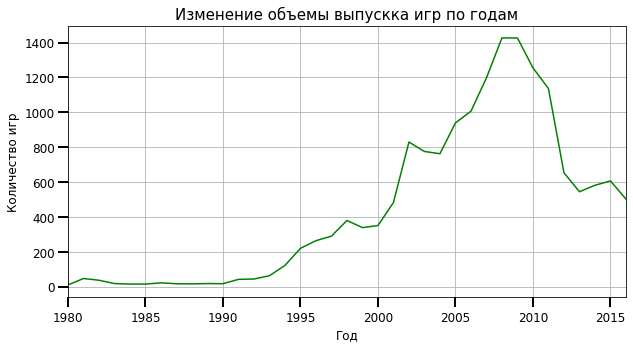

In [ ]:
# Построения графика для опредеоения изменеиня объемы выпуска по годам
df.groupby('year_of_release')['year_of_release'].count().plot(figsize=(10, 5), color='green')
plt.title('Изменение объемы выпускка игр по годам', fontsize=15)
plt.xlabel('Год',  fontsize=12)
plt.ylabel('Количество игр', fontsize=12)
plt.tick_params(axis = 'both', which = 'major', length = 10, width = 2, labelsize = 12)
plt.grid()
plt.show()


Наичиная с 1990 годов наблюдается планвый рост объема выпуска игр - за 5 лет пририост в 200 новых игр.  
Наичиная с 2000 годов эта разница увеличивается - за 5 лет прирост в 600 новых игр.  
Тенденция роста сохраняется до 2008 г., далее спад.  


### Исследование продаж по платформам

Определим топ-5 платформ по продажам.  
По полученному списку сделаем срез основного датасета.  
Далее построим распределение по годам.

In [ ]:
df_grouped_platform = df.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)
df_grouped_platform.head(10)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [ ]:
list_top_platform = df_grouped_platform.head(5).index
list_top_platform

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')

In [ ]:
# Фильтруемся по топовым платформам
df_filtered_top_platform = df.loc[df['platform'].isin(list_top_platform)]

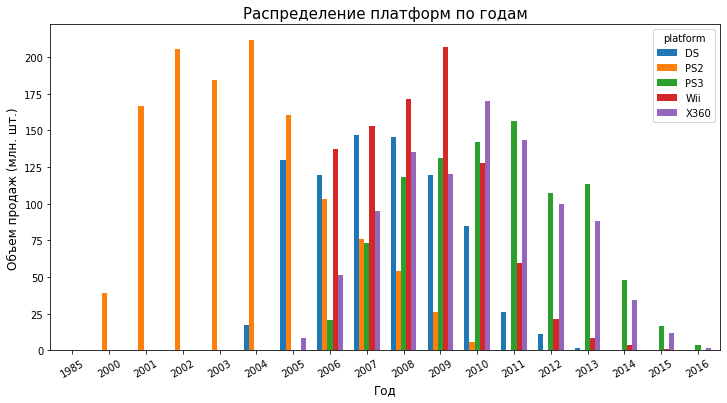

In [ ]:
# Построение графика распределения платформм по годам на основе сводной таблицы
df_filtered_top_platform.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0).\
plot(kind='bar', figsize=(12,6), rot=30, width=0.7)
plt.title('Распределение платформ по годам', fontsize=15)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Объем продаж (млн. шт.)', fontsize=12)
plt.show()

**Вывод**
***
1. Средний срок жизни платформы составляет 10 лет.  
2. Одни из самых востребованных являются *(по 11 лет каждая)*: **PS2**, **PS3**, **X360**  
Их суммарные продажи в среднем составляют 1000 млн. шт. копий, а пик продаж достигается за 5-6 лет.
3. Актуальный период, на котором будем проводиться исследование, считаем с 2012 по 2016 г. *(на основе среднего cрока достижения пика продаж)* 



In [ ]:
# Актуальный период
list_current_period = [2012, 2013, 2014, 2015, 2016]

In [ ]:
df_current_period = df.loc[df['year_of_release'].isin(list_current_period)]
df_current_period['year_of_release'].unique()

<IntegerArray>
[2013, 2015, 2012, 2014, 2016]
Length: 5, dtype: Int64

Посмотрим на распределение общих продаж, поработаем с выбросами.

In [ ]:
df_current_period['total_sales'].describe()

count    2886.000000
mean        0.501223
std         1.249157
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: total_sales, dtype: float64

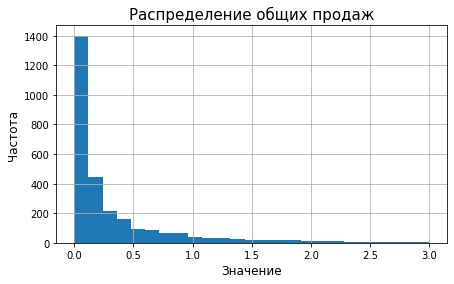

In [ ]:
df_current_period['total_sales'].hist(bins=25, range=(0,3), figsize=(7,4))
plt.title('Распределение общих продаж', fontsize=15)
plt.xlabel('Значение', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.show()


Видно, что после 1.5 тянется длинный хвост.  
Описатальная статистика нам подсказывает, что среднее завышено - при значении 3 квантиля = 0.68, есть максимальное значение = 21, которое и смещает среднюю.

Сделаем срез нашего актуаального период - возьмем только те значения, у которых общие продажи меньше 1.5

In [ ]:
df_current_period = df_current_period.loc[df_current_period['total_sales'] <=1.5]

In [ ]:
df_current_period['total_sales'].describe()

count    2663.000000
mean        0.239178
std         0.309653
min         0.010000
25%         0.030000
50%         0.100000
75%         0.310000
max         1.490000
Name: total_sales, dtype: float64

Среднее снизилось с 0.5 до 0.2, и стало ближе к медиане = 0.1
Это хороший знак, будем считать что мы получили типичное значение общих продаж = 0.23

1. Определим общие продажи по каждой платформе;
2. Выделим среди них лидеров;
3. Опередилм их состояние - рост/падение.

In [ ]:
df_current_period.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)


,total_sales
platform,
PS3,140.51
X360,95.12
PS4,88.62
3DS,78.48
XOne,70.81
PSV,47.22
PC,47.15
WiiU,39.72
Wii,13.62


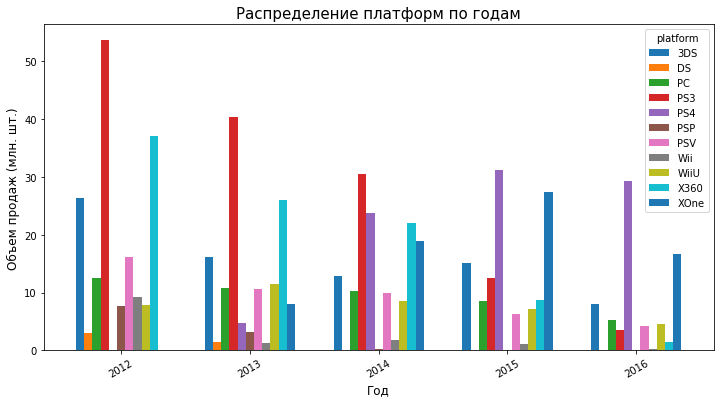

In [ ]:
# График распределения платформ по годам за актуальный период
df_current_period.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0).\
plot(kind='bar', figsize=(12,6), rot=30, width=0.7)
plt.title('Распределение платформ по годам', fontsize=15)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Объем продаж (млн. шт.)', fontsize=12)
plt.show()

**Вывод**
***
1. За актуальный период можно выделить 3 лидеров по продажам:
- **PS3** - к 2016 году характерен спад объемов, можно сделать вывод, что платформа находится в конце жизненного цикла
- **X360** и **3DS**- аналогично, к 2016 г снижается объем продаж, а значит их можно отнести к "вымирающим".
- **PS4** - самамя развивающаяся платформа, стремящася к пику продаж, ее мы отмечаем как потенциально прибыльная платформа.
- **XOne** - cамая стабильная платформа, возможно с более длительным жизненым циклом. Ее мы не будем исключить и также отметим как потенциально прибыльная.  

Перед нами стоит задача выделить 3 потенциальных платформы, поэтому:
- **PC** - не находится в топах продаж, но имеет стабильное положение на рынке, как говорится "бессмертная классика" 

Итого: PS4, XOne, PC

In [ ]:
# Срез только по потенциально прибыльным платформам
df_current_platform = df_current_period.loc[df_current_period['platform'].isin(['PS4', 'XOne', 'PC'])]

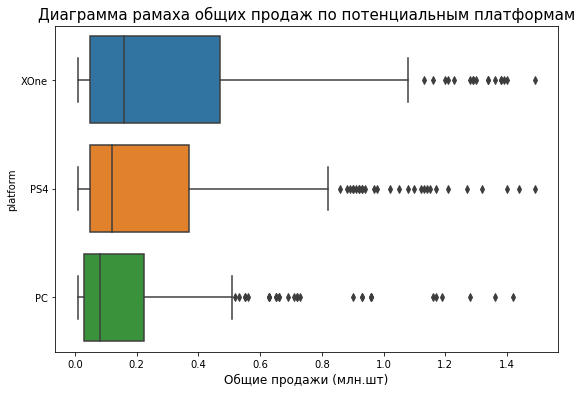

In [ ]:
# Диаграмма размаха общих продаж по потенциально прибыльным платформам
plt.figure(figsize=(9,6))
sns.boxplot(y='platform', x='total_sales', data=df_current_platform)
plt.title('Диаграмма рамаха общих продаж по потенциальным платформам', fontsize=15)
plt.xlabel('Общие продажи (млн.шт)', fontsize=12)
plt.show()


#### Вывод
***
1. В результате анализа выделено 3 потенциально прибыльных платформы: PS4, XOne, PC
2. Самая зараждающаяся и стремящася к пику продаж - PS4, в свою очередь XOne и PC считаются стабильными, с большим жизннеым циклом.
3. Продажи этих платформ в среднем не превышают 0.2 млн. шт. в год. По диаграмме размаха можно сделать вывод, что у всех трех характерно смещение медианы влево, а значит  больше половины продаж были высокими, особенно это прослеживается у платформы Xone.

### Исследование влияния оценки критиков/пользователей на продажи

1. Напишем функцию, которая будет строить диаграмму рассеяния и считать коффициент корреляции.
2. Применим функцию к нашим потенциальным платформам.
3. Сделаем выводы.

In [ ]:
# Функция для построения диаграммы рассеяния и определения коэффициента корреляции
def scatter_plot (value):

    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    fig.suptitle(value, fontsize=20)

# Диаграмма рассеяния: Оценка критиков и Общий объем продаж
    axes[0,0].set_title('Взаимосявзь продажи с оценкой критиков', fontsize=15)
    df_current_platform.loc[df_current_platform['platform'] == value]\
    .plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, ax=axes[0,0])

# Определения коэффициент корреляции: Оценка критиков и Общий объем продаж
    axes[0,1].set_axis_off()
    koef_corr_critic = df_current_platform.loc[df_current_platform['platform'] == value, 'critic_score']\
    .corr(df_current_platform.loc[df_current_platform['platform'] == value, 'total_sales'])
    axes[0,1].text(0.5, 0.5, 'Коэффициент корреляции {:.2f}'.format(koef_corr_critic), fontsize = 18, horizontalalignment = 'center', verticalalignment='top')

# Диаграмма рассеяния: Оценка пользователей и Общий объем продаж
    axes[1,0].set_title('Взаимосявзь продажи с оценкой пользователей', fontsize=15)
    df_current_platform.loc[df_current_platform['platform'] == value]\
    .plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, ax=axes[1,0])

# Определения коэффициент корреляции: Оценка пользователей и Общий объем продаж
    axes[1,1].set_axis_off()
    koef_corr_user = df_current_platform.loc[df_current_platform['platform'] == value, 'user_score']\
    .corr(df_current_platform.loc[df_current_platform['platform'] == value, 'total_sales'])
    axes[1,1].text(0.5, 0.5, 'Коэффициент корреляции {:.2f}'.format(koef_corr_user), fontsize = 18, horizontalalignment = 'center', verticalalignment='top')


In [ ]:
# Список перспективных платформ
list_current_platform = df_current_platform['platform'].unique()

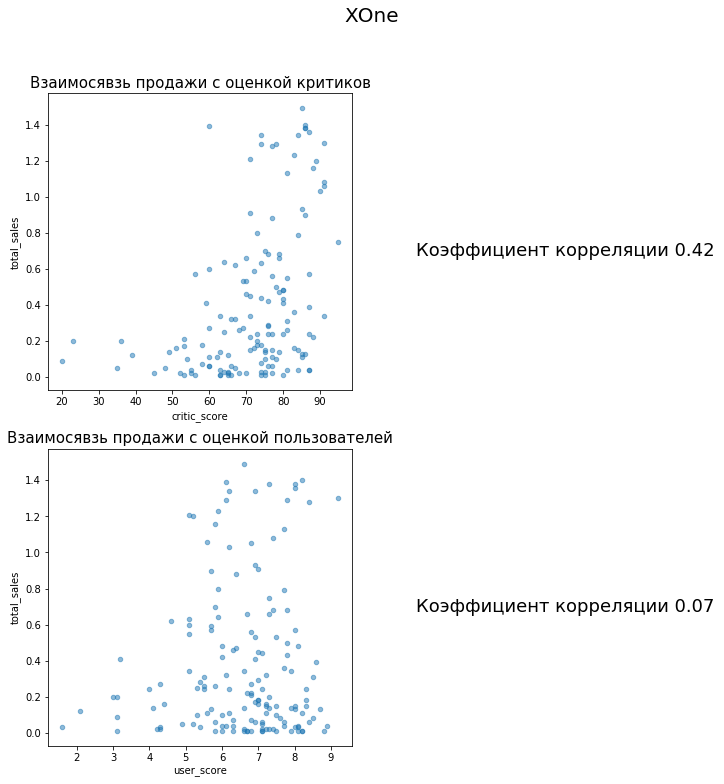

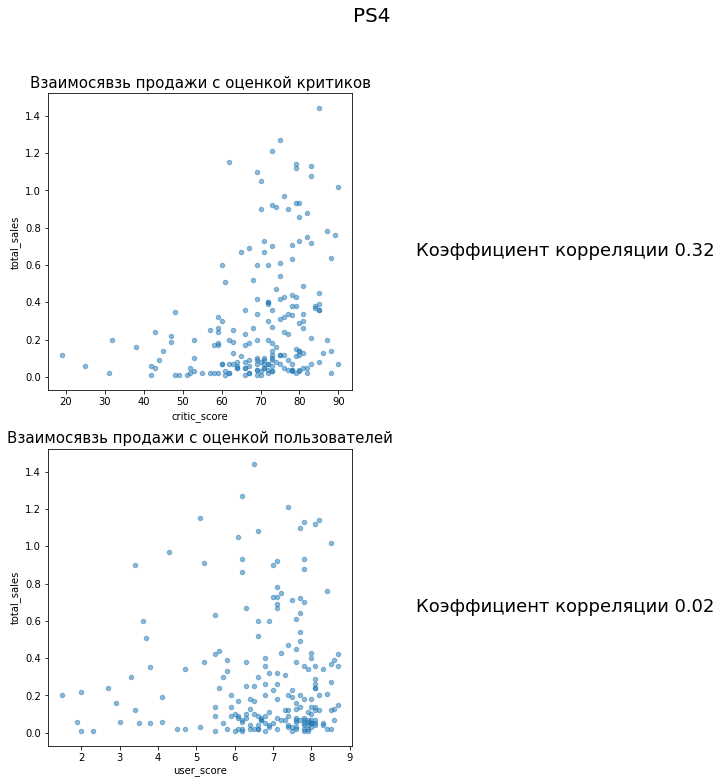

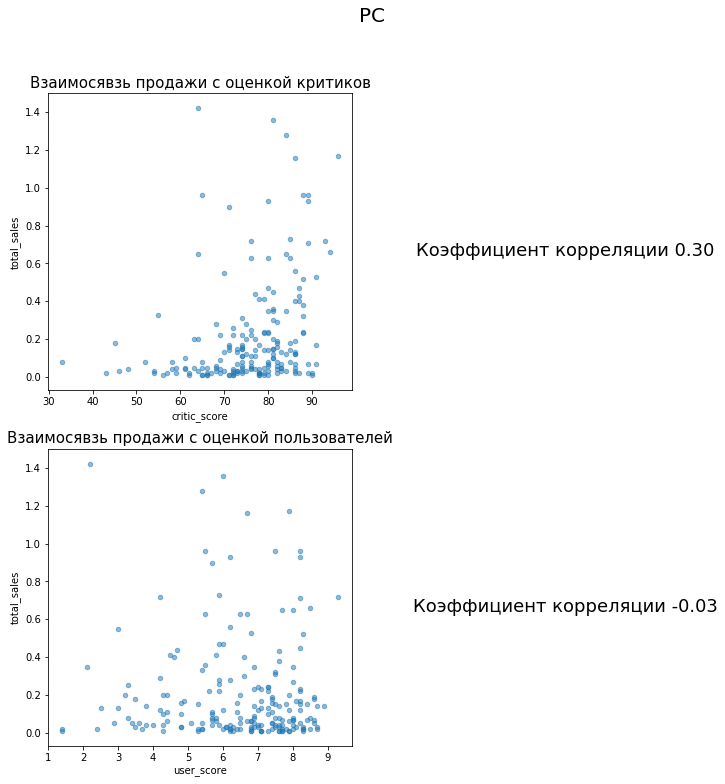

In [ ]:
for value in list_current_platform:
    scatter_plot(value)

#### Вывод
***
1. На всех платформах между оценкой критиков и общим объемом продаж существует связь - небольшая, положительная. На PC и PS4 она на уровне 0.3, на XOne - 0.42. То есть на платформе XOne, пользователи больше доверяют оценки критиков, чем на других платформах.
2. Связь между оценкой пользователей и общим объемом продаж очень слабая - на платформах XOne и PS4 - положительная, на уровне 0.05, на платформе PC - отрицательная, на уровне (-0.03)

Можно сделать общий вывод о том, что между общим объемом продаж и оценкой критиков есть умеренная, положительная связь. На популярной платформе PS4 она меньше чем на платформе Xone.  Связи между общим объемом продаж и оценкой пользователей нет. 

### Исследование популярности жанров

1. Анализ строим на датасете за актуальный период, только по перспективным платформам.
1. Построим график распределения по жанрам.
2. Выделим жанры с высокими и низкими  продажами.

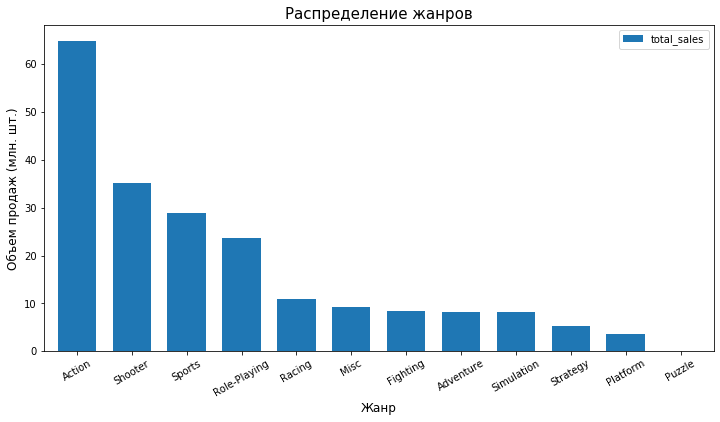

In [ ]:
df_current_platform.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).\
plot(kind='bar', figsize=(12,6), rot=30, width=0.7)
plt.title('Распределение жанров', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Объем продаж (млн. шт.)', fontsize=12)
plt.show()

#### Вывод
***
По графику можно сделать вывод, что есть жанры, с низкими общими продажами *(менее 10 млн. шт)*.  
Сюда мы относим:   *Драки, Приключения, Стратегии  и пр.*  

И есть жанры с высокими продажами *(более 10 млн. шт.)*:  
*Экшн, Стрелялки, Спорт, Ролевые игры, Гонки.*  
То есть это либо командные игры, либо динамичные игры, с большим количеством действий.  

**Экшн** - жанр с самыми высокими продажами - 60 млн.шт., что в 6 раз больше игр с низкими продажами, и в 2 раза больше игр с выосокмими продажами.


## Составление портрета пользователя

Анализ строим на датасете за актуальный период, по всем платформам *(не только перпесктивные)*

**<center> Пользователи *North America* </center>**

Популярные платформы  в регионе

In [ ]:
# Сводная по сумме общих продаж по каждой платформе за акутальный период
df_na_region_platform = df_current_period.loc[:,['platform', 'na_sales', 'total_sales']]\
.pivot_table(index='platform', values=['na_sales', 'total_sales'], aggfunc='sum')\
.sort_values(by='total_sales', ascending=False).reset_index().head(5)


In [ ]:
# Добавление нового столбца с расчетом доли продаж региона от общих продаж
df_na_region_platform ['share_sales'] = round(df_na_region_platform ['na_sales']  / df_na_region_platform ['total_sales'],2)
df_na_region_platform

,platform,na_sales,total_sales,share_sales
0,PS3,51.30,140.51,0.37
1,X360,56.24,95.12,0.59
2,PS4,30.29,88.62,0.34
3,3DS,20.05,78.48,0.26
4,XOne,40.82,70.81,0.58


Популярные жанры в регионе

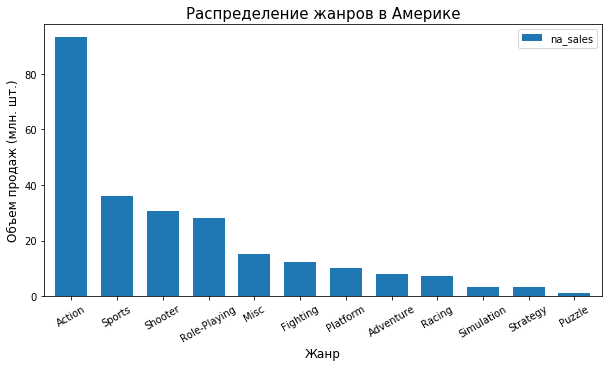

In [ ]:
# Распределение жанров по сумме продаж в регионе
df_current_period.loc[:,['genre', 'na_sales']]\
.pivot_table(index='genre', values=['na_sales'], aggfunc='sum')\
.sort_values(by='na_sales', ascending=False).plot(kind='bar', figsize=(10,5), rot=30, width=0.7)
plt.title('Распределение жанров в Америке', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Объем продаж (млн. шт.)', fontsize=12)
plt.show()

Влияние рейтинга на продажи в регионе

In [ ]:
# Сводная по сумме прода региона, по каждому рейтингу,  за акутальный период
df_na_region_rating = df_current_period.loc[:,['rating', 'na_sales']]\
.pivot_table(index='rating', values='na_sales', aggfunc='sum')
df_na_region_rating.sort_values(by='na_sales', ascending=False)

,na_sales
rating,
M,74.54
E10+,49.85
E,42.89
T,38.93


**<center>Пользователи *Европы* </center>**

Популярные платформы  в регионе

In [ ]:
# Сводная по сумме общих продаж по каждой платформе за акутальный период
df_eu_region_platform = df_current_period.loc[:,['platform', 'eu_sales', 'total_sales']]\
.pivot_table(index='platform', values=['eu_sales', 'total_sales'], aggfunc='sum')\
.sort_values(by='total_sales', ascending=False).reset_index().head(5)

In [ ]:
# Добавление нового столбца с расчетом доли продаж региона от общих продаж
df_eu_region_platform ['share_sales'] = round(df_eu_region_platform ['eu_sales']  / df_eu_region_platform ['total_sales'],2)
df_eu_region_platform

,platform,eu_sales,total_sales,share_sales
0,PS3,42.95,140.51,0.31
1,X360,29.76,95.12,0.31
2,PS4,36.32,88.62,0.41
3,3DS,15.89,78.48,0.20
4,XOne,23.58,70.81,0.33


Популярные жанры в регионе

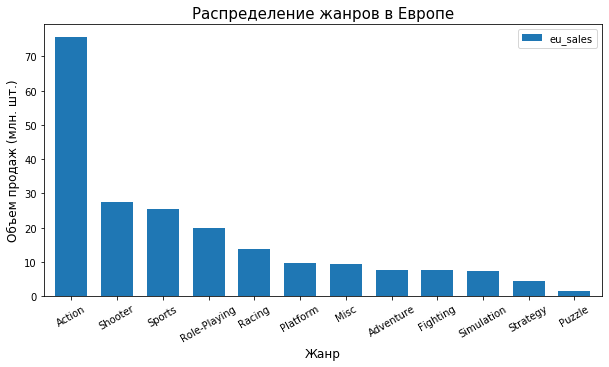

In [ ]:
# Распределение жанров по сумме продаж в регионе
df_current_period.loc[:,['genre', 'eu_sales']]\
.pivot_table(index='genre', values=['eu_sales'], aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False).plot(kind='bar', figsize=(10,5), rot=30, width=0.7)
plt.title('Распределение жанров в Европе', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Объем продаж (млн. шт.)', fontsize=12)
plt.show()

Влияние рейтинга на продажи в регионе

In [ ]:
# Сводная по сумме прода региона, по каждому рейтингу,  за акутальный период
df_eu_region_rating = df_current_period.loc[:,['rating', 'eu_sales']]\
.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
df_eu_region_rating.sort_values(by='eu_sales', ascending=False)

,eu_sales
rating,
M,60.26
E10+,40.55
E,36.98
T,30.21


**<center>Пользователи *Японии* </center>**

Популярные платформы  в регионе

In [ ]:
# Сводная по сумме общих продаж по каждой платформе за акутальный период
df_jp_region_platform = df_current_period.loc[:,['platform', 'jp_sales', 'total_sales']]\
.pivot_table(index='platform', values=['jp_sales', 'total_sales'], aggfunc='sum')\
.sort_values(by='total_sales', ascending=False).reset_index().head(5)

In [ ]:
# Добавление нового столбца с расчетом доли продаж региона от общих продаж
df_jp_region_platform ['share_sales'] = round(df_jp_region_platform ['jp_sales']  / df_jp_region_platform ['total_sales'],2)
df_jp_region_platform

,platform,jp_sales,total_sales,share_sales
0,PS3,27.99,140.51,0.20
1,X360,0.89,95.12,0.01
2,PS4,9.07,88.62,0.10
3,3DS,39.36,78.48,0.50
4,XOne,0.13,70.81,0.00


Популярные жанры в регионе

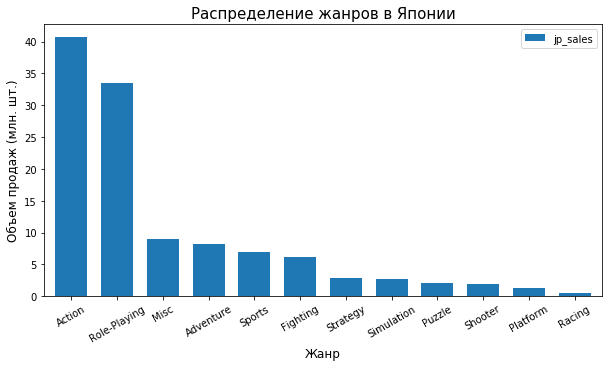

In [ ]:
# Сводная по сумме прода региона, по каждому рейтингу,  за акутальный период
df_current_period.loc[:,['genre', 'jp_sales']]\
.pivot_table(index='genre', values=['jp_sales'], aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False).plot(kind='bar', figsize=(10,5), rot=30, width=0.7)
plt.title('Распределение жанров в Японии', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Объем продаж (млн. шт.)', fontsize=12)
plt.show()

Влияние рейтинга на продажи в регионе

In [ ]:
# Сводная по сумме прода региона, по каждому рейтингу,  за акутальный период
df_eu_region_rating = df_current_period.loc[:,['rating', 'jp_sales']]\
.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
df_eu_region_rating.sort_values(by='jp_sales', ascending=False)

,jp_sales
rating,
T,21.84
M,10.76
E,8.40
E10+,4.96


#### Вывод
***

**<center>Исследование популярных платформ по регионам</center>**

В каждом регионе, в топах находятся платформы - *PS3, X360, PS4*

1. **Американские** пользователи любители приставок *XOne* и *X360* - их доля продаж самая большая - 59% и 58% соответственно.  

2. Пользователи **Европы** предпочитаю больше приставки на платформе *PS4* - их доля продаж составляет 41%, и является самой большой среди других регионов. Платформы *PS3, XOne, X360* по доле продаж находятся на одном уровне - не более 35%.  

3. **Японские** пользователи - патриоты и самые консервативные. Большая доля продаж приходится на платформу *3DS* - 50%.

Если рассматривать инвестиции в перспективные платформы, то: 
- **PS4** - это инвестиции в европейский рынок.  
- **XOne** - это инвестии в американский рынок.  
  

**<center> Исследование популярных жанров по регионам</center>**
1. **Американские** пользователи предпочитают игры жанров *Экшн,Спорт и Стрелялки*. Активные игры, в которых требуется много действий.
2. **Евпропейцы**, в преподчтениях схожи с американцами, за исключением того, что *стрелялки* они любят больше чем *спорт*.
3. **Японские** пользователи схожи с американцами и европейцами только п предпочтении к экшенам. Этот жанр у них на 1 месте. Но, на 2 месте они препочитают ролевые игры. Как правило это сложные игры, с большими мирами,  полные  фэнтази, что в принципе хакартеризует японцев.

**<center> Исследование влияния рейтинга на продажи по регионам</center>**

1. Рейтинги, которые образуют саммую большу сумму продаж, в **американских** и **европейских** регионах идентична. Здесь на первом месте игры в рейтинге для взрослых *(M)*. Эти игры могут содержать наисилие, грубый юмор, непристойные сцены. Вторую строчку занимают игры для лиц старше 10 лет *(E10+)*. Здесь больше мультипликационной анимации, сцены насилия, практически нет.
2. **Японский** регион отличается. Здесь на первом месте игры для подростов *(Т)*, на втором месте игры для взрослых *(М)*. Игры для детей на последних строчках. То есть Японцы в большей доли предпочитают жестокие игры, чем американцы или европейцы.

## Проверка гипотез

Перед нами стоит задача проверить гипотезы:
1. Средние пользовательские рейтинги платформ XOne и PC одинаковые.
    - **H0:** Средние пользовательские рейтинги платформ XOne и PC одинаковые.
    - **H1:** Средние пользовательские рейтинги платформ XOne и PC различаются.

2. Средние пользовательские рейтинги жанров *Action* и *Sports* разные.
    - **H0:** Средние пользовательские рейтинги жанров *Action* и *Sports* одинаковые.
    - **H1:** Средние пользовательские рейтинги жанров *Action* и *Sports* различаются.

В проверки гипотез ипользуются данные по оценки пользователей.  
Прежде чем приступим к проверки выполним следующие действия:
1. Проверим распределение оценки пользователей
2. Проведем тест на равенство дисперсий в группах - это позволит нам провести более точное определение значимости.

In [ ]:
df_current_period['user_score'].describe()

count    1346.000000
mean        6.639747
std         1.569222
min         0.200000
25%         5.800000
50%         7.000000
75%         7.800000
max         9.300000
Name: user_score, dtype: float64

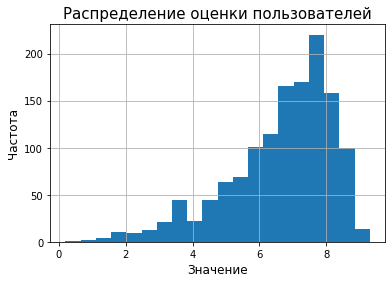

In [ ]:
df_current_period['user_score'].hist(bins=20)
plt.title('Распределение оценки пользователей', fontsize=15)
plt.xlabel('Значение',  fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.show()

По графику можно сделать вывод, что большинство наблюдений имеют оценки выше среднего. Есть "хвост" из низких оценок пользователей.
Так как различие с медианой не значительное, **фильтровать значения оценок ниже 3 мы не будем**

**Проверим гипотезу:**  
Средние пользовательские рейтинги платформ XOne и PC одинаковые.

Проверим равенство дисперсий в группах с платформами XOne и PC


In [ ]:
levene(df_current_period.loc[df_current_period['platform'] == 'XOne', 'user_score'].dropna(),\
       df_current_period.loc[df_current_period['platform'] == 'PC', 'user_score'].dropna())

LeveneResult(statistic=4.575651804020862, pvalue=0.03311502741371573)

P-уровень значимости менее 0.05. Это означает что дисперчии в группах статистически различаются.  
То есть в расчете ttest , будет использоватья дисперсия каждой выборки. Параметр `equal_var = False`

In [ ]:
# критический уровень статистической значимости
alpha = 0.05  

# Сравнеие средней 
results = st.ttest_ind(df_current_period.loc[df_current_period['platform'] == 'XOne', 'user_score'].dropna(),\
                       df_current_period.loc[df_current_period['platform'] == 'PC', 'user_score'].dropna(), equal_var = False)

print('p-значение:', results.pvalue)
print('-----------------------------------------------')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.45954262726512596
-----------------------------------------------
Не получилось отвергнуть нулевую гипотезу


**Проверим гипотезу:**  
Средние пользовательские рейтинги жанров Action и Sports разные.

Проверим равенство дисперсий в группах с жанрами *Action* и *Sports*

In [ ]:
levene(df_current_period.loc[df_current_period['genre'] == 'Action', 'user_score'].dropna(),\
       df_current_period.loc[df_current_period['genre'] == 'Sports', 'user_score'].dropna())

LeveneResult(statistic=23.02202910958659, pvalue=2.001634327543729e-06)

P-уровень значимости менее 0.05. Это означает что дисперчии в группах статистически различаются.  
То есть в расчете ttest , будет использоватья дисперсия каждой выборки. Параметр `equal_var = False`

In [ ]:
# критический уровень статистической значимости
alpha = 0.05  

# Сравнеие средней 
results = st.ttest_ind(df_current_period.loc[df_current_period['genre'] == 'Action', 'user_score'].dropna(),\
                       df_current_period.loc[df_current_period['genre'] == 'Sports', 'user_score'].dropna(), equal_var = False)

print('p-значение:', results.pvalue)
print('-----------------------------------------------')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 6.3828024213492754e-15
-----------------------------------------------
Отвергаем нулевую гипотезу


#### Вывод
***
Проведенные тесты позволяют сделать вывод:
- Мы не може отвергнуть гипотезу о том, что средние оценки пользователей на платформах *XOne* и *PC* одинаковвые.  
- Средние оценки пользователей у жанров *Action* и *Sports* имеют статистически значимые различия. 

## Общий вывод

**<center> Общие результаты исследований</center>**

1. За актуальный период *(с 2012 по 2016)* мы выделили 3 перспективные платформы.
    - **PS4** - самая востребованная, стремится к пиковым продажам.  
    - **XOne** и **PС** - самые стабильные по продажам, с более длительным сроком жизни - их стоит также учитывать к рекламных кампаниях.  

Продажи этих платформ в среднем не превышают 0.2 млн. шт. в год.  
Статистиеский тест показал, что средняя оценка пользователей на платформах **XOne** и **PC** не имеет различий.  
То есть пользователи отдают одинаковое предпочтение обоим.
***
2. На выбор пользователей влияет оценки критиков.  
Связь умеренная и положительная.  
На платформах **PS4** и **PC** связь оценки критиков с продажами на одном уровне, на **XOne** выше.  
Связи между оценкой пользователей и продажами нет.
***

3. Если говорить в общем о жанрах, то можно выделить:
    - с низкими продажами (менее 10 млн. шт) - *Драки, Приключения, Стратегии*;
    - с высокими продажами (более 10 млн. шт) - *Экшн, Стрелялки, Спорт, Ролевые игры, Гонки.*   

Статистический тест показал, что средняя оценка пользователей по жанрам **Action** и **Sports** имеет значимые различия.  
То есть пользователи больше предпочитают **Action**, и это не случайность. Этот жанр имеет самые высокие продажи - 60 млн.шт., что в 6 раз больше игр с низкими продажами, и в 2 раза больше игр с высокими продажами.  


**<center> Рeзультаты исследований по регионам</center>**
Если рассматривать кампании по конкретным регионам, то можно выделить следущую характеристику.

1. Регион **северной Америки** любители приставок XOne и X360 - их доля продаж самая большая - 59% и 58% соответственно.   Предпочитают игры жанров: Экшн,Спорт и Стрелялки. То есть Активные игры, в которых требуется много действий, с рейтингом - М, что означает игры взрослых.

2. Пользователи **Европы** предпочитаю больше приставки на платформе **PS4** - их доля продаж составляет 41%, и является самой большой среди других регионов. Евпропейцы, в преподчтениях схожи с американцами, за исключением того, что стрелялки они любят больше чем спорт. Рейтинг топовых игр - М, то есть в этих игры могут содержать наисилие, грубый юмор, непристойные сцены.

3. **Японские** пользователи - патриоты и самые консервативные. Большая доля продаж приходится на платформу 3DS - 50%.  
Экшн у них также на 1 месте. Но, на 2 месте уверенно занимают ролевые игры. Как правило это сложные игры, с большими мирами, полные фэнтази. Потрейтингам на первой строчке игры для подростов (Т), на втором месте игры для взрослых (М).  Игры для детей на последних строчках. То есть Японцы в большей доли предпочитают жестокие игры, чем американцы или европейцы.




